# Textual Analytics on Amazon Fine Food Reviews

In [89]:
import numpy as np
import pandas as pd


In [90]:
data = pd.read_csv('./Reviews.csv')

In [91]:
data.drop(['Id', 'ProductId','ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary'], inplace=True, axis=1)

In [92]:
data.shape

(568454, 2)

In [93]:
data1 = data.head(30000)

In [140]:
data1.to_csv('./subsetData.csv')

In [94]:
data1.shape

(30000, 2)

In [95]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data1, test_size=0.3)

In [96]:
len(train)
#len(test)

21000

In [97]:
#data.shape

In [98]:
train.columns

Index(['UserId', 'Text'], dtype='object')

In [99]:
train.head()

,UserId,Text
4899,A3L964J8M7I7KF,"This coffee is bold, dark and tasty. unlike ma..."
22391,A265B1IZE5RVG6,We love these pretzels. Appreciate the long e...
25677,AE1ZME0QHI8U,Kind of bitter. I recommend buying on first in...
12975,A2BK3Z3E2QL89P,"I have tried all the Via blends, and my favori..."
13198,A2XU6J41ZQOJ2V,Good coffee. I guess I expected it to be very ...


In [100]:
 # We can find many stop words which has to be treated
    
pd.Series(' '.join(train['Text']).lower().split()).value_counts()[:10]

the     67940
i       51555
and     46475
a       43449
to      37272
of      29205
it      28215
is      26428
this    23061
for     20011
dtype: int64

## All Data together

(-0.5, 399.5, 199.5, -0.5)

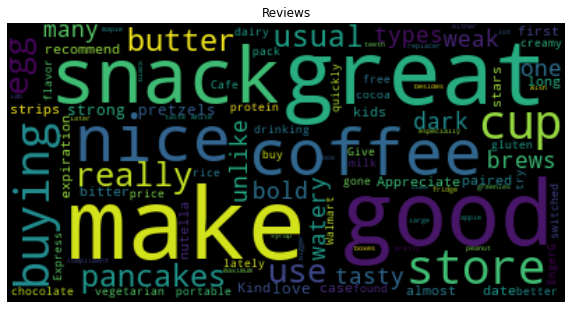

In [138]:
import os
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Display the generated image:
plt.figure(figsize=(10,10))
wordcloud = WordCloud().generate(np.array2string(train["Text"].unique()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Reviews")
plt.axis("off")

In [102]:
# Preprocessing - Create Term Frequency Matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

Remove punctuation/lower casing

In [103]:


# Load the regular expression library
import re

train['Text Processed'] = train['Text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
train['Text Processed'] = train['Text'].map(lambda x: x.lower())

<>:4: DeprecationWarning: invalid escape sequence \.
<>:4: DeprecationWarning: invalid escape sequence \.
<>:4: DeprecationWarning: invalid escape sequence \.
<ipython-input-103-cadfdf923c1d>:4: DeprecationWarning: invalid escape sequence \.
  train['Text Processed'] = train['Text'].map(lambda x: re.sub('[,\.!?]', '', x))
C:\Users\allen\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\allen\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

### Tokenize words and further clean-up text

In [104]:
text = " ".join(review for review in train['Text Processed'])
print ("There are {} words in the combination of all review.".format(len(text)))

There are 9119230 words in the combination of all review.


In [105]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

#example_sent = "This is a sample sentence, showing off the stop words filtration."

stop_words = set(stopwords.words('english')) 

word_tokens = word_tokenize(text) 

#filtered_sentence = [w for w in word_tokens if not w in stop_words] 

filtered_sentence = [] 

for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 

#print(word_tokens) 
#print(filtered_sentence) 


In [106]:
filtered_sentence

['coffee',
 'bold',
 ',',
 'dark',
 'tasty',
 '.',
 'unlike',
 'many',
 'types',
 'watery',
 'weak',
 'one',
 'brews',
 'nice',
 'strong',
 'cup',
 'coffee',
 '.',
 'love',
 'pretzels',
 '.',
 'appreciate',
 'long',
 'expiration',
 'date',
 '.',
 'makes',
 'great',
 'kids',
 'snack',
 'paired',
 'nutella',
 '.',
 '5',
 'stars',
 '!',
 'kind',
 'bitter',
 '.',
 'recommend',
 'buying',
 'first',
 'store',
 'buying',
 'case',
 '.',
 ',',
 'almost',
 'strips',
 'great',
 'portable',
 'vegetarian',
 'protein',
 'snack',
 '.',
 'tried',
 'via',
 'blends',
 ',',
 'favorite',
 'far',
 'still',
 'starbucks',
 'tribute',
 '.',
 'sad',
 'ran',
 'last',
 'year',
 '.',
 'back-up',
 'columbian',
 ',',
 'always',
 'good',
 ',',
 'always',
 'loved',
 'sumatra',
 '.',
 'cherry',
 'note',
 ',',
 'come',
 'across',
 "'flavor",
 "'",
 '.',
 'like',
 'flavored',
 'coffee',
 '.',
 'heat',
 'microwave',
 'two',
 'minutes',
 'mug',
 '1',
 '%',
 'organic',
 'milk',
 '.',
 'yummy',
 '!',
 '<',
 'br',
 '/',
 '>'

### Function to perform lemmatize and stem preprocessing steps on the data set.

In [107]:
import gensim
from gensim.utils import simple_preprocess

# Build the bigram and trigram models

In [108]:

bigram = gensim.models.Phrases(filtered_sentence, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[filtered_sentence], threshold=100)# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [109]:
# NLTK Stop words
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Define functions for stopwords, bigrams, trigrams and lemmatization

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [110]:
import spacy

Remove Stop Words

In [111]:

data_words_nostops = remove_stopwords(filtered_sentence)

In [112]:
#data_words_nostops

Form Bigrams

In [113]:

data_words_bigrams = make_bigrams(data_words_nostops)

In [114]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

Do lemmatization keeping only noun, adj, vb, adv

In [115]:

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [116]:
print(data_lemmatized[:40])

[['coffee'], ['bold'], [], ['dark'], [], [], [], ['many'], ['type'], ['watery'], ['weak'], [], [], ['nice'], ['strong'], [], ['coffee'], [], ['love'], ['pretzel'], [], [], ['long'], ['expiration'], ['date'], [], ['make'], ['great'], ['kid'], ['snack'], ['pair'], [], [], [], ['star'], [], ['kind'], ['bitter'], [], ['recommend']]


### Data Transformation: Corpus and Dictionary

In [117]:
import gensim.corpora as corpora
from gensim.corpora import Dictionary
dictionary = Dictionary(texts)

Create Dictionary

In [118]:

id2word = corpora.Dictionary(data_lemmatized)
id2word

Create Corpus

In [119]:

texts = data_lemmatized

Term Document Frequency

In [120]:

corpus = [id2word.doc2bow(text) for text in texts]

In [121]:
# View
print(corpus[:50])
type(corpus)

[[(0, 1)], [(1, 1)], [], [(2, 1)], [], [], [], [(3, 1)], [(4, 1)], [(5, 1)], [(6, 1)], [], [], [(7, 1)], [(8, 1)], [], [(0, 1)], [], [(9, 1)], [(10, 1)], [], [], [(11, 1)], [(12, 1)], [(13, 1)], [], [(14, 1)], [(15, 1)], [(16, 1)], [(17, 1)], [(18, 1)], [], [], [], [(19, 1)], [], [(20, 1)], [(21, 1)], [], [(22, 1)], [(23, 1)], [(24, 1)], [], [(23, 1)], [(25, 1)], [], [], [(26, 1)], [(27, 1)], [(15, 1)]]


list

##### Gensim creates a unique id for each word in the document. 
The produced corpus shown above is a mapping of (word_id, word_frequency).

### Build Latent Dirichlet Allocation (LDA) model

In [122]:

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=4, 
                                       )

In [123]:
from pprint import pprint# Print the Keyword in the 10 topics
lda_topic= pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.043*"love" + 0.042*"use" + 0.041*"try" + 0.034*"would" + 0.025*"eat" + '
  '0.023*"really" + 0.021*"order" + 0.020*"think" + 0.020*"price" + '
  '0.019*"bag"'),
 (1,
  '0.066*"good" + 0.045*"make" + 0.033*"find" + 0.027*"food" + 0.026*"go" + '
  '0.025*"time" + 0.024*"tea" + 0.022*"much" + 0.021*"give" + 0.016*"come"'),
 (2,
  '0.058*"taste" + 0.049*"coffee" + 0.047*"product" + 0.021*"also" + '
  '0.020*"little" + 0.019*"say" + 0.018*"get" + 0.017*"even" + 0.016*"add" + '
  '0.016*"flavor"'),
 (3,
  '0.038*"great" + 0.036*"buy" + 0.032*"dog" + 0.014*"look" + 0.012*"year" + '
  '0.012*"may" + 0.012*"work" + 0.012*"water" + 0.011*"sweet" + 0.011*"thing"')]


### LDA -  Interactive Visualization

In [124]:

import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, sort_topics=False)
pyLDAvis.display(lda_display)

### Compute Model Perplexity and Coherence Score

In [125]:
from gensim.models import CoherenceModel# Compute Coherence Score

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.8446432991376711


In [126]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


Perplexity:  -7.042816533964844


### Hierarchical Dirichlet Process

In [52]:
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
hdpmodel = HdpModel(corpus=corpus, id2word=id2word)

In [54]:
hdpmodel.show_topics()

[(0,
  '0.004*good + 0.004*taste + 0.003*coffee + 0.003*love + 0.003*product + 0.003*use + 0.003*make + 0.003*great + 0.003*try + 0.002*buy + 0.002*would + 0.002*dog + 0.002*find + 0.002*go + 0.002*food + 0.002*eat + 0.002*tea + 0.002*time + 0.002*much + 0.002*really'),
 (1,
  '0.005*good + 0.004*taste + 0.003*coffee + 0.003*product + 0.003*make + 0.003*love + 0.003*use + 0.003*buy + 0.003*great + 0.003*try + 0.002*would + 0.002*find + 0.002*dog + 0.002*eat + 0.002*food + 0.002*tea + 0.002*time + 0.002*really + 0.002*go + 0.001*also'),
 (2,
  '0.005*good + 0.004*taste + 0.003*coffee + 0.003*product + 0.003*love + 0.003*make + 0.003*use + 0.003*try + 0.003*great + 0.003*would + 0.002*buy + 0.002*dog + 0.002*find + 0.002*food + 0.002*tea + 0.002*eat + 0.002*bag + 0.002*go + 0.002*time + 0.002*much'),
 (3,
  '0.005*good + 0.004*taste + 0.003*love + 0.003*coffee + 0.003*product + 0.003*make + 0.003*great + 0.003*try + 0.003*use + 0.003*buy + 0.002*would + 0.002*dog + 0.002*find + 0.002*foo

In [53]:
from gensim.models import CoherenceModel# Compute Coherence Score

coherence_model_hdp = CoherenceModel(model=hdpmodel, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_hdp = coherence_model_hdp.get_coherence()

print('\nCoherence Score: ', coherence_hdp)


Coherence Score:  0.8632288691974509


In [70]:
#lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]

hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]

ldatopics = [[word for word, prob in topic] for topicid, topic in lda_model.show_topics(formatted=False)]

In [76]:
hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

lda_coherence = CoherenceModel(topics=ldatopics, texts=texts, dictionary=dictionary, window_size=10).get_coherence()

In [77]:
def evaluate_bar_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

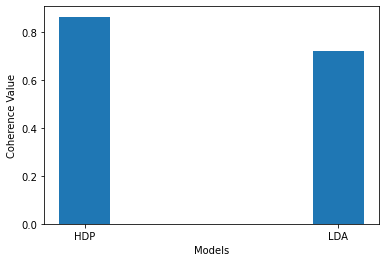

In [79]:
evaluate_bar_graph([hdp_coherence, lda_coherence],
                   [ 'HDP', 'LDA'])